# Example I - Calculating the real-space Zel'dovich power spectrum

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ctm import CTM

import matplotlib as mpl

from matplotlib import animation
from IPython.display import HTML

from matplotlib import rc
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.transforms import blended_transform_factory

from scipy.interpolate import interp1d as interp

mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
mpl.rcParams["text.usetex"] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'cm'
mpl.rcParams["lines.linewidth"] = 2.2
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["axes.labelsize"] = 14.
mpl.rcParams["xtick.top"] = True
mpl.rcParams["xtick.labelsize"] = 14.
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.right"] = True
mpl.rcParams["ytick.labelsize"] = 14.
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["xtick.minor.bottom"] = False
mpl.rcParams["xtick.minor.top"] = False
mpl.rcParams["ytick.minor.left"] = False
mpl.rcParams["ytick.minor.right"] = False

## Calculate the linear power spectrum at $z=0$



The automatic cosmological parameters are: $$h = 0.6737,\ \Omega_bh^2 = 0.02233,\ \Omega_{cdm}h^2 = 0.11933,\ k_{max}=100,\ n_s = 0.9665,\ \sigma_8 = 0.8102$$.

To change these use ```P_lin = CTM(h=0.69, omega0_b=0.002).linear_power(k_vals, z_val=0.0)```

The parameters in the ```linear_power()``` function are: 
- ```k_vals```= the $k$ values you wish to evaluate the linear power spectrum at
- ```z_val```= the redshift you wish to evaluate the linear power spectrum at

In [2]:
## Define k values

k_vals = np.logspace(-3, 1, 1000)

## Compute the linear power spectrum at z=0

P_lin = CTM().linear_power(k_vals)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


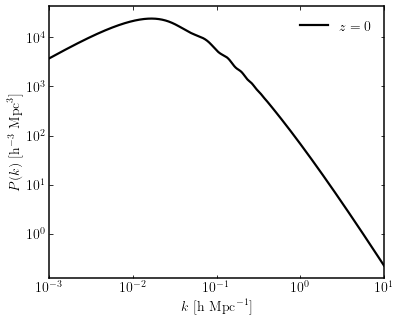

In [3]:
## Plot the resulting linear power spectrum

fig = plt.figure(figsize=(6, 5))
gs = gridspec.GridSpec(1, 1)

gs.update(wspace=0.05, hspace=0.1)

ax1 = fig.add_subplot(gs[0])
ax1.loglog(k_vals, P_lin, color="black", label=r"$z=0$")
ax1.set_xlabel(r"$k\ [\mathrm{h}\ \mathrm{Mpc}^{-1}]$")
ax1.set_ylabel(r"$P(k)\ [\mathrm{h}^{-3}\ \mathrm{Mpc}^{3}]$")
ax1.set_xlim([1e-3, max(k_vals)])
ax1.legend(loc="upper right", frameon=False, fontsize=14)
plt.show()

## Calculate the linear power spectrum at $z=10$

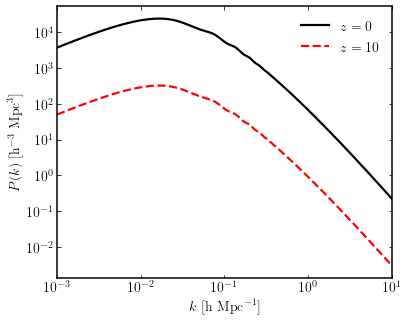

In [4]:
## Compute the linear power spectrum at z=10

P_lin_10 = CTM().linear_power(k_vals, z_val=10.0)

## Plot the resulting linear power spectrum

fig = plt.figure(figsize=(6, 5))
gs = gridspec.GridSpec(1, 1)

gs.update(wspace=0.05, hspace=0.1)
ax1 = fig.add_subplot(gs[0])

ax1.loglog(k_vals, P_lin, color="black", label=r"$z=0$")
ax1.loglog(k_vals, P_lin_10, color="red", linestyle="--", label=r"$z=10$")
ax1.set_xlabel(r"$k\ [\mathrm{h}\ \mathrm{Mpc}^{-1}]$")
ax1.set_ylabel(r"$P(k)\ [\mathrm{h}^{-3}\ \mathrm{Mpc}^{3}]$")
ax1.set_xlim([1e-3, max(k_vals)])
ax1.legend(loc="upper right", frameon=False, fontsize=14)

## Calculate the Zel'dovich power spectrum at $z=0$

The automatic parameters for the computation of the Zel'dovich power spectrum are: $k_\mathrm{min}$=1e-5,  $k_\mathrm{max}$=100.0 and $nk$=3000

> Note that the minimum and maximum $k$ values were chosen in order for the integral to converge.

Other parameters are:

- ```z_val```: value at which the power spectrum is calculated *(default: z=0)*

- ```input_k```: input $k$ values

- ```input_P```: input linear power spectrum values at $z=0$ **(note input_k values must be given as well)**

- ```kc```: the cutoff value if you desire an initial Gaussian damped power spectrum to be used *(default: kc=0)*

These can be changed using:

```CTM().zeldovich_power(input_k=k_vals, z_val=1.0, input_P=P_lin, kc=5.0)```

The Zel'dovich power spectrum is given by: 

$$\mathrm{P}_\mathrm{zel}=\int{d^3q}\ \mathrm{e}^{-i\mathbf{k}\cdot\mathbf{q}}\left[\mathrm{e}^{-\frac{1}{2}k_ik_jA_{ij}\left(\mathbf{q}\right)}-1\right]$$

where $A_{ij}\left(\mathbf{q}\right)=X\left(q\right)\delta_{ij}+Y\left(q\right)\hat{q}_i\hat{q}_j$ and $X\left(q\right)=\frac{1}{2\pi^2}\int_0^\infty{dk\ }\left[\frac{2}{3}-2\frac{j_1\left(kq\right)}{kq}\right]\mathrm{P}_\mathrm{L}\left(k,z\right)$ and $Y\left(q\right)=\frac{1}{2\pi^2}\int_0^\infty{dk\ }\left[6\frac{j_1\left(kq\right)}{kq}-2j_0\left(kq\right)\right]\mathrm{P}_\mathrm{L}\left(k,z\right)$

In [6]:
k, P_zel = CTM(nk=1000).zeldovich_power()

Calculated the input power spectrum
Calculated the covariances
Calculating the power spectrum:
[========= ] 99%
Time taken to calculate the power spectrum: 1.2793 minutes


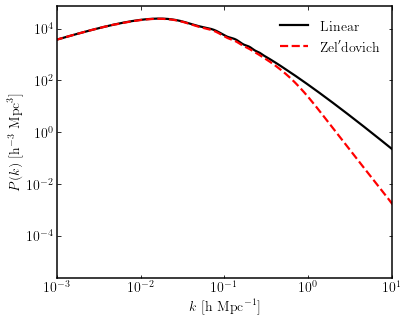

In [7]:
## Plot the resulting power spectrum

fig = plt.figure(figsize=(6, 5))
gs = gridspec.GridSpec(1, 1)

gs.update(wspace=0.05, hspace=0.1)
ax1 = fig.add_subplot(gs[0])

ax1.loglog(k_vals, P_lin, color="black", label=r"$\mathrm{Linear}$")
ax1.loglog(k, P_zel, color="red",linestyle="--", label=r"$\mathrm{Zel}^\prime\mathrm{dovich}$")
ax1.set_xlabel(r"$k\ [\mathrm{h}\ \mathrm{Mpc}^{-1}]$")
ax1.set_ylabel(r"$P(k)\ [\mathrm{h}^{-3}\ \mathrm{Mpc}^{3}]$")
ax1.set_xlim([1e-3, max(k_vals)])
ax1.legend(loc="upper right", frameon=False, fontsize=14)

## Calculate the Zel'dovich power spectrum with specified $k$ values and at $z=10$

Calculated the input power spectrum
Calculated the covariances
Calculating the power spectrum:
[========= ] 99%
Time taken to calculate the power spectrum: 1.2242 minutes


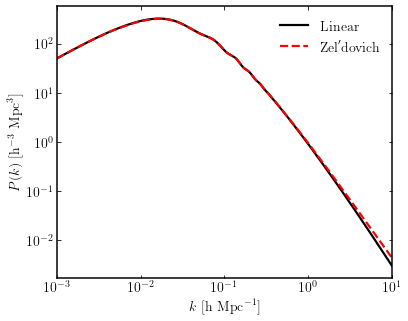

In [8]:
P_zel = CTM(nk=1000).zeldovich_power(input_k=k_vals, z_val=10.0)

## Plot the resulting power spectrum

fig = plt.figure(figsize=(6, 5))
gs = gridspec.GridSpec(1, 1)

gs.update(wspace=0.05, hspace=0.1)
ax1 = fig.add_subplot(gs[0])

ax1.loglog(k_vals, P_lin_10, color="black", label=r"$\mathrm{Linear}$")
ax1.loglog(k_vals, P_zel, color="red", linestyle="--", label=r"$\mathrm{Zel}^\prime\mathrm{dovich}$")
ax1.set_xlabel(r"$k\ [\mathrm{h}\ \mathrm{Mpc}^{-1}]$")
ax1.set_ylabel(r"$P(k)\ [\mathrm{h}^{-3}\ \mathrm{Mpc}^{3}]$")
ax1.set_xlim([1e-3, max(k_vals)])
ax1.legend(loc="upper right", frameon=False, fontsize=14)

# Example II - Calculating the real-space CTM power spectrum

## Calculating the CTM power spectrum for the Beyond Zel'dovich approximation

The CTM parameters are:

- ```n_val```: the number of Spherical Bessel functions summed over *(default n=32)*

- ```z_val```: value at which the GCTM power spectrum is calculated *(default z=0)*

- ```zinit```: value at which the GCTM time dependent factors are integrated from *(default zinit=99)*

- ```epsilon```: the value of the expansion parameter *(default epsilon=1)*

- ```kc```: the cutoff value for calculating the damped GCTM power spectrum *(default kc=0.0)*

- ```input_k```: specify $k$ values

- ```input_P```: specify linear power spectrum values at $z=0$ **(note input_k values must be given as well)**

- ```input_z```: The redshift values for which the $A(z)$ and $B(z)$ arrays are calculated for

- ```input_A```: input $A(z)$ array **(note input_z values must be given as well)**

- ```input_B```: input $B(z)$ array **(note input_z values must be given as well)**

These values can be speficied by

```CTM().ctm_power(z_val=1.0, zinit=50.0, epsilon=0.01, kc=1.0, input_k=k_vals)```

The CTM trajectory is:

$$x_i\left(\mathbf{q},z\right)=q_i+\Psi_j\left(\mathbf{q},z_i\right)\left[A\left(z\right)\delta_{ij}+B_\epsilon\left(z\right)E_{ij}\left(\mathbf{q},z_i\right)\right]$$

where $A\left(z\right)=\frac{D_1\left(z\right)}{D_1\left(z_i\right)}$ for the Beyond Zel'dovich approximation or can be specified by the user, $B\left(z\right)=-\frac{3}{2}\Omega_m^2H_0\epsilon_\mathrm{BZ}\int_{z'}^z\frac{dz''}{a''H\left(z''\right)}\int_{z_i}^z\frac{dz'}{H\left(z'\right)}A\left(z'\right)^2$ and $E_{ij}=\nabla_i\nabla_j\nabla^{-2}\delta$.


In [9]:
P_ctm = CTM(nk=1000).ctm_power(z_val=0.0, input_k=k_vals)

Calculated the input power spectrum
Calculated time dependent functions A(z) and B(z)
Calculated the covariances
Calculating the power spectrum:
[========= ] 99%
Time taken to calculate the power spectrum: 2.0141 minutes


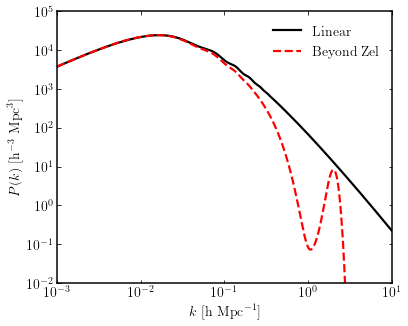

In [10]:
## Plot the resulting power spectrum

fig = plt.figure(figsize=(6, 5))
gs = gridspec.GridSpec(1, 1)

gs.update(wspace=0.05, hspace=0.1)

ax1 = fig.add_subplot(gs[0])
ax1.loglog(k_vals, P_lin, color="black", label=r"$\mathrm{Linear}$")
ax1.loglog(k_vals, P_ctm, color="red", linestyle='--', label=r"$\mathrm{Beyond\ Zel}$")
ax1.set_xlabel(r"$k\ [\mathrm{h}\ \mathrm{Mpc}^{-1}]$")
ax1.set_ylabel(r"$P(k)\ [\mathrm{h}^{-3}\ \mathrm{Mpc}^{3}]$")
ax1.set_xlim([1e-3, 10])
ax1.set_ylim([1e-2, 1e5])
ax1.legend(loc="upper right", frameon=False, fontsize=14)

## Calculating the damped CTM power spectrum for the Beyond Zel'dovich approximation

The Gaussian damped initial power spectrum is given by:

$$\mathrm{P}\left(k,z\right)=\mathrm{e}^{-\left(\frac{k}{k_c}\right)^2}\mathrm{P}_\mathrm{L}\left(k,z\right)$$

In [11]:
P_ctm_damped = CTM(nk=1000).ctm_power(kc=5.0, input_k=k_vals)

Calculated the input power spectrum
Calculated time dependent functions A(z) and B(z)
Calculated the covariances
Calculating the power spectrum:
[========= ] 99%
Time taken to calculate the power spectrum: 1.9203 minutes


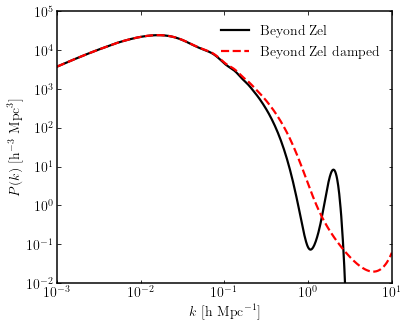

In [12]:
fig = plt.figure(figsize=(6,5))
gs = gridspec.GridSpec(1,1)

gs.update(wspace=0.05, hspace=0.1)

ax1 = fig.add_subplot(gs[0])
ax1.loglog(k_vals, P_ctm, color="black", label=r"$\mathrm{Beyond\ Zel}$")
ax1.loglog(k_vals, P_ctm_damped, color="red", linestyle='--', label=r"$\mathrm{Beyond\ Zel\ damped}$")
ax1.set_xlabel(r"$k\ [\mathrm{h}\ \mathrm{Mpc}^{-1}]$")
ax1.set_ylabel(r"$P(k)\ [\mathrm{h}^{-3}\ \mathrm{Mpc}^{3}]$")
ax1.set_xlim([1e-3, 10])
ax1.set_ylim([1e-2, 1e5])
ax1.legend(loc="upper right", frameon=False, fontsize=14)

## Calculating the CTM power spectrum with input $A(z)$ and $B(z)$ functions

In [13]:
z_vals = np.linspace(0.0, 200.0, 100)
A_vals = (1.0+z_vals)**(-1)

P_gctm = CTM(nk=1000).ctm_power(input_z=z_vals, input_A=A_vals, input_k=k_vals)

Calculated the input power spectrum
Calculated time dependent functions A(z) and B(z)
Calculated the covariances
Calculating the power spectrum:
[========= ] 99%
Time taken to calculate the power spectrum: 1.4586 minutes


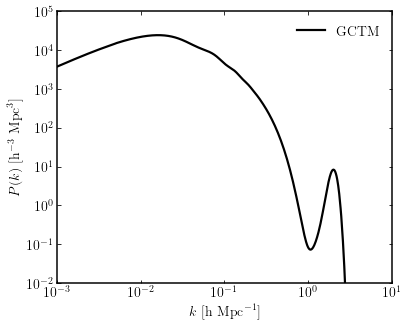

In [17]:
fig = plt.figure(figsize=(6,5))
gs = gridspec.GridSpec(1,1)

gs.update(wspace=0.05, hspace=0.1)

ax1 = fig.add_subplot(gs[0])
ax1.loglog(k_vals, P_ctm, color="black", label=r"$\mathrm{GCTM}$")
ax1.set_xlabel(r"$k\ [\mathrm{h}\ \mathrm{Mpc}^{-1}]$")
ax1.set_ylabel(r"$P(k)\ [\mathrm{h}^{-3}\ \mathrm{Mpc}^{3}]$")
ax1.set_xlim([1e-3, 10.0])
ax1.set_ylim([1e-2, 1e5])
ax1.legend(loc="upper right", frameon=False, fontsize=14)